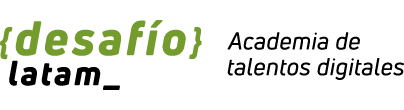

#<center><font color="green">Solución Desafío - Introducción al Machine Learning </font></center>

##<font color="green">Parte I </font>

1.   ¿Cuál es la diferencia entre el aprendizaje supervisado y el aprendizaje no supervisado?

El aprendizaje supervisado implica entrenar modelos utilizando datos etiquetados, donde se proporciona información de entrada y su correspondiente salida deseada, con el objetivo de aprender una función que pueda predecir las salidas correctas para nuevas instancias, por lo que existe una supervisión del aprendizaje por medio de la variable objetivo; por otro lado, el aprendizaje no supervisado se basa en la exploración de datos no etiquetados, buscando descubrir patrones, estructuras o relaciones inherentes en los datos sin la necesidad de etiquetas previas, lo que permite segmentar datos, detectar anomalías o reducir la dimensionalidad de forma automática.

2.   ¿Qué tipo de aprendizaje utilizarías para construir un modelo predictivo?

Algoritmos de aprendizaje supervisado, ya que se tiene una etiqueta que se desea aprender a predecir y en este caso sería de clasificación, ya que la etiqueta corresponde a una categoría.

3.   ¿Por qué razón es necesario dividir el set de datos en 2 set de datos al momento de realizar algún modelamiento supervisado? ¿Cuáles son los 2 set de datos y cúal es la función de cada uno?

Es necesario dividir el set de datos en dos conjuntos, comúnmente conocidos como conjunto de entrenamiento y conjunto de test/validación, esto se debe a que el objetivo principal del aprendizaje supervisado es construir un modelo que pueda generalizar bien a nuevos datos, es decir, que pueda realizar predicciones precisas en casos no observados durante el entrenamiento. Dividir los datos en entrenamiento y prueba ayuda a evaluar la capacidad del modelo para generalizar más allá de los datos utilizados para entrenarlo.

Debido a esto el conjunto de entrenamiento es utilizado para entrenar el modelo, es decir, ajustar los parámetros del modelo utilizando algún algoritmo y el conjunto de test es utilizado para calcular las métricas de desempeño, que me indican cual es la precisión o exactitud del modelo en nuevos datos. Es importante que el conjunto de entrenamiento sea lo suficientemente grande y representativo de los datos disponibles, para que el modelo pueda aprender de manera efectiva y capturar la variabilidad de los datos reales.

Finalmente, gracias al set de datos de validación podemos identificar si el algoritmo logra generalizar el problema o si tiene problemas al aprender los patrones subyacentes en los datos y seguir mejorandolo.

4.   ¿Cuál es la principal diferencia en el modelamiento de la regresión lineal para un enfoque estadístico y un enfoque de aprendizaje de máquinas?

La principal diferencia en el modelamiento de la regresión lineal entre un enfoque estadístico y un enfoque de aprendizaje de máquinas radica en el objetivo y la metodología utilizada.

En el enfoque estadístico, la regresión lineal se utiliza principalmente para explorar las relaciones entre variables y realizar inferencias sobre los parámetros del modelo. El objetivo principal es comprender y explicar la relación entre una variable dependiente y una o más variables independientes, así como realizar pruebas de hipótesis y obtener estimaciones de los coeficientes de regresión. En este enfoque, se hacen suposiciones sobre la distribución de los errores y se utilizan métodos estadísticos para analizar la significancia y la calidad del ajuste del modelo.

Por otro lado, en el enfoque de aprendizaje de máquinas, la regresión lineal se utiliza como una técnica para predecir valores numéricos en base a variables de entrada. El objetivo principal es desarrollar un modelo que pueda hacer predicciones precisas y generalizables en nuevos datos. En este enfoque, se enfatiza más en la capacidad predictiva del modelo y se utiliza un enfoque más automatizado basado en algoritmos de aprendizaje. Se busca encontrar los coeficientes del modelo que minimicen el error de predicción en los datos de entrenamiento.

5.   Escoje una industria de acuerdo a tu área de interés, rubro de trabajo o área de estudios (por ejemplo, salud, telecomunicaciones, retail, medioambiente, etc). Menciona al menos 1 aplicación en esa industria de:

Esta parte es muy libre y va a depender de que industria elija el estudiante, ojala poder volar la imaginación y aplicaciones a sus campos, lo importante es que se mencione la variable objetivo o el problema a solucionar.


##<font color="green">Parte II </font>

La solución a esta segunda parte del desafío no se estructuran de acuerdo con las preguntas o actividades planteadas, ya que estas son más bien una referencia para el trabajo que se debe realizar.

- Importar las librerías necesarias

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Librerías Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

import warnings
warnings.filterwarnings('ignore')

- Creamos una función para analizar la data

In [ ]:
def calidad_datos(data):
    tipos = pd.DataFrame({'tipo': data.dtypes},index=data.columns)
    na = pd.DataFrame({'nulos': data.isna().sum()}, index=data.columns)
    na_prop = pd.DataFrame({'porc_nulos':data.isna().sum()/data.shape[0]},
    		  index=data.columns)
    ceros = pd.DataFrame({'ceros':[data.loc[data[col]==0,col].shape[0] for col in data.columns]},
    		index= data.columns)
    ceros_prop = pd.DataFrame({'porc_ceros':[data.loc[data[col]==0,col].shape[0]/data.shape[0] for col in data.columns]},
    			index= data.columns)
    summary = data.describe(include='all').T

    summary['dist_IQR'] = summary['75%'] - summary['25%']
    summary['limit_inf'] = summary['25%'] - summary['dist_IQR']*1.5
    summary['limit_sup'] = summary['75%'] + summary['dist_IQR']*1.5

    summary['outliers'] = data.apply(lambda x: sum(np.where((x<summary['limit_inf'][x.name]) | (x>summary['limit_sup'][x.name]),1 ,0)) if x.name in summary['limit_inf'].dropna().index else 0)


    return pd.concat([tipos, na, na_prop, ceros, ceros_prop, summary], axis=1).sort_values('tipo')

- Cargamos y preparamos los datos

In [ ]:
data = pd.read_csv('./data/data-housing.csv')

- Analizamos la calidad de datos (esto puede variar mucho, y conviene analizar la importancia que se le dará a esta parte que tiene más que ver con el Módulo anterior que con el presente. Por lo mismo, lo mostrado aquí debe verse solo como una referencia)

In [ ]:
calidad = calidad_datos(data)
print(calidad.shape)
calidad.head()

(9, 20)


tipo  nulos  porc_nulos  ceros  porc_ceros  count unique  top   
price      int64      0         0.0      0         0.0  545.0    NaN  NaN  \
area       int64      0         0.0      0         0.0  545.0    NaN  NaN   
bedrooms   int64      0         0.0      0         0.0  545.0    NaN  NaN   
bathrooms  int64      0         0.0      0         0.0  545.0    NaN  NaN   
stories    int64      0         0.0      0         0.0  545.0    NaN  NaN   

          freq            mean             std        min        25%   
price      NaN  4766729.247706  1870439.615657  1750000.0  3430000.0  \
area       NaN     5150.541284     2170.141023     1650.0     3600.0   
bedrooms   NaN        2.965138        0.738064        1.0        2.0   
bathrooms  NaN        1.286239         0.50247        1.0        1.0   
stories    NaN        1.805505        0.867492        1.0        1.0   

                 50%        75%         max   dist_IQR limit_inf  limit_sup   
price      4340000.0  5740000.0  13300000.0  2310000.0  -35000.0  9205000.0  \
area          4600.0     6360.0     16200.0     2760.0    -540.0    10500.0   
bedrooms         3.0        3.0         6.0        1.0       0.5        4.5   
bathrooms        1.0        2.0         4.0        1.0      -0.5        3.5   
stories          2.0        2.0         4.0        1.0      -0.5        3.5   

           outliers  
price            15  
area             12  
bedrooms         12  
bathrooms         1  
stories          41

In [ ]:
# Se observa la cantidad de variables de cada tipo que tiene
calidad.tipo.value_counts()

tipo
int64     6
object    3
Name: count, dtype: int64

In [ ]:
calidad.sort_values('porc_ceros', ascending=False).loc[:, ['porc_ceros']].head(20).plot(kind='bar')
plt.axhline(0.5, color='red')
plt.title('Porcentaje de ceros por variable')
plt.show()

In [ ]:
calidad.sort_values('porc_nulos', ascending=False).loc[:, ['porc_nulos']].head(20).plot(kind='bar')
plt.title('Porcentaje de nulos por variable')
plt.show()

# No hay nulos

In [ ]:
calidad.sort_values('outliers', ascending=False).loc[:, ['outliers']].head(20).plot(kind='bar')
plt.title('outliers por variable')
plt.show()

In [ ]:
# NO HAY VARIABLES QUE NO ENTREGAN INFORMACION
calidad.loc[(calidad['std']==0)|(calidad['unique']==1)]

Empty DataFrame
Columns: [tipo, nulos, porc_nulos, ceros, porc_ceros, count, unique, top, freq, mean, std, min, 25%, 50%, 75%, max, dist_IQR, limit_inf, limit_sup, outliers]
Index: []

- Analizamos la distribución de los datos, para familiarizarnos con ellos.

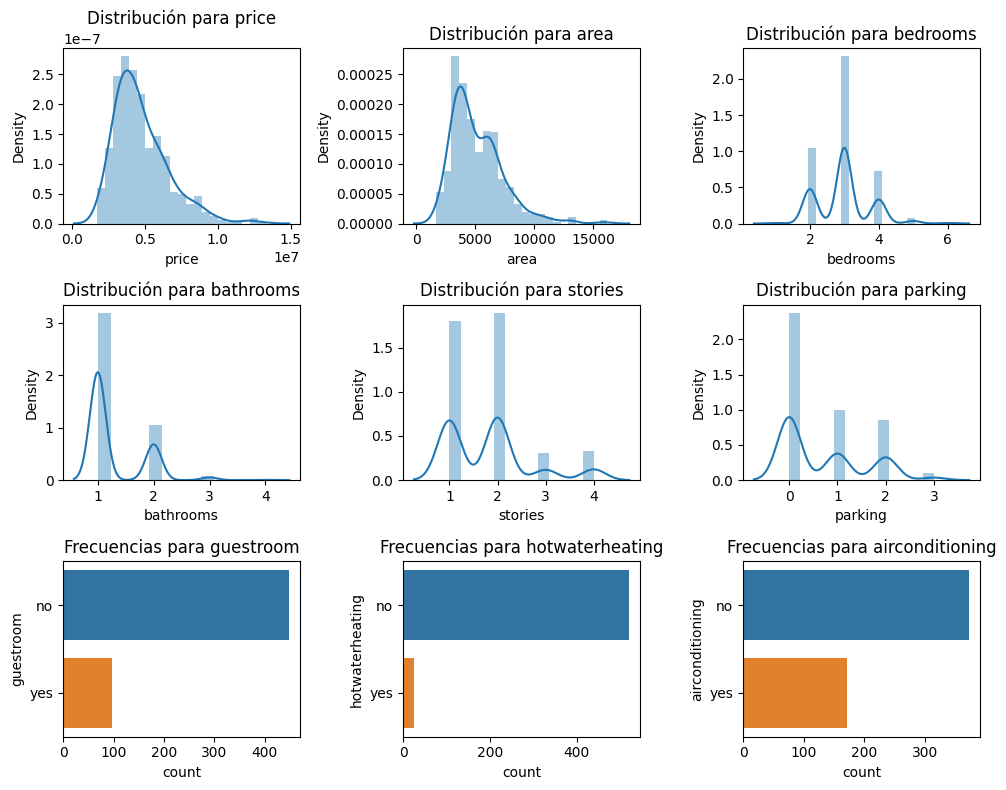

In [ ]:
plt.figure(figsize=(10, 8))
for n, i in enumerate(calidad.index):
    plt.subplot(3, 3, n + 1)
    if calidad.loc[i, 'tipo']=='object':
        sns.countplot(y= data[i], order = data[i].value_counts().index)
        plt.title('Frecuencias para {}'.format(i))
        plt.tight_layout()
    else:
        sns.distplot(data[i])
        plt.title('Distribución para {}'.format(i))
        plt.tight_layout()

- Observamos las correlaciones presentes

In [ ]:
## Get Dummies
# Se van a transformar las variables binarias de dummies, para tener solo vectores numericos

data_preprocess = pd.get_dummies(data, drop_first=True).astype('int')

Text(0.5, 1.0, 'Correlaciones')

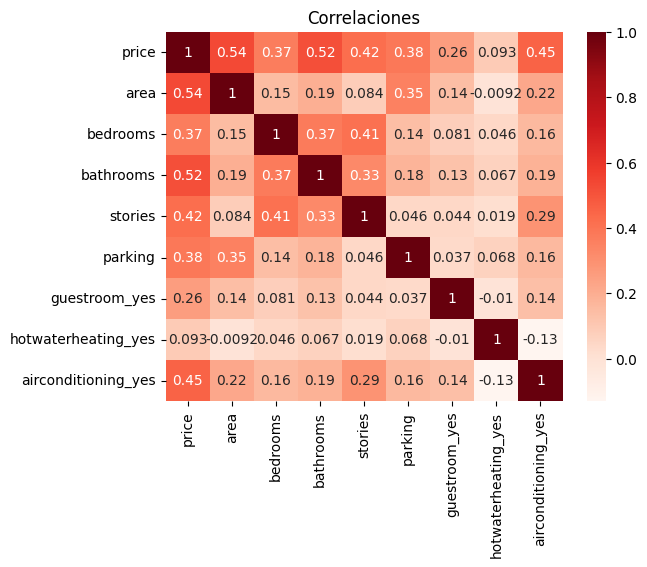

In [ ]:
corr_data = data_preprocess.corr()

# Ojo: La correlacion de pearson es una medida de correlacion lineal entre variables númericas, por lo que las variables binarias no estaría 100%, pero de todas formas da buenos input en el análisis
sns.heatmap(corr_data, cmap='Reds', annot=True)
plt.title('Correlaciones')

- Creación del modelo y entrenamiento

In [ ]:
X = data_preprocess.drop(['price'], axis=1)
y = data_preprocess.loc[:, ['price']]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42)

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

- Evaluación del modelo

In [ ]:
# Prediccion con el modelo entrenado
y_pred_train = model.predict(X_train)

# Evaluacion de modelos
mse_train = mean_squared_error(y_train, y_pred_train)
r2_train = model.score(X_train, y_train)

print('Error cuadrado medio (MSE) en Train:', mse_train)
print('Coeficiente de determinación (R^2) en Train:', r2_train)

Error cuadrado medio (MSE) en Train: 1142290980321.3276
Coeficiente de determinación (R^2) en Train: 0.6295343438678266


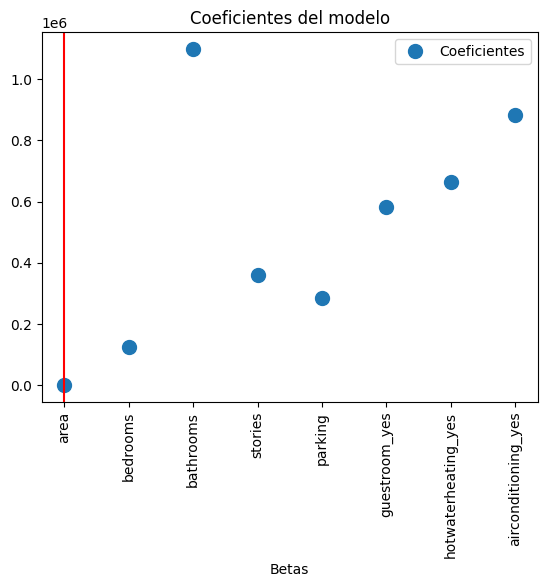

In [ ]:
coeficientes = pd.DataFrame({'variables': X_train.columns, 'coef':model.coef_[0]})
plt.plot(coeficientes['variables'], coeficientes['coef'], 'o', label='Coeficientes', markersize=10)
plt.axvline(0, color='red')
plt.xlabel('Betas');
plt.legend()
plt.xticks(rotation=90)
plt.title('Coeficientes del modelo' );

In [ ]:
# Prediccion con el modelo entrenado
y_pred = model.predict(X_test)

# Evaluacion de modelos
mse = mean_squared_error(y_test, y_pred)
r2 = model.score(X_test, y_test)

print('Error cuadrado medio (MSE):', mse)
print('Coeficiente de determinación (R^2):', r2)


Error cuadrado medio (MSE): 1961490677565.4883
Coeficiente de determinación (R^2): 0.6119372009958433
